# This jupyter notebook provides various analysis about shear results

In [1]:
%aiida
%load_ext autoreload
%autoreload 2

## imports and settings

In [36]:
import os
import yaml
import numpy as np
from pprint import pprint
from matplotlib import pyplot as plt
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from aiidaplus.plot import line_chart, band_plot, band_plots
from aiidaplus.get_data import get_structure_data, get_relax_data, get_phonon_data
from aiidaplus.utils import (get_qpoints_from_band_labels,
                             get_default_labels_of_twinmode)
from twinpy.lattice.brillouin import get_default_path_for_twin

shear_dir = os.path.join('..', 'data', 'shear')

## extract yaml files

In [3]:
yamlfiles = [ name for name in os.listdir(shear_dir) if 'yaml' in name ]
yamlfiles.sort()
shears = []
for yamlfile in yamlfiles:
    with open(os.path.join(shear_dir, yamlfile)) as f:
        shears.append(yaml.load(f, Loader=yaml.SafeLoader))

## data details

In [4]:
print("# keys of each shear data")
print(shears[0].keys())
print("")

print("# calculator_settings")
pprint(shears[0]['calculator_settings'])
print("")

for key in ['parent', 'phonon_pks', 'relax_pks', 'relax_results', 'shear_conf', 'shear_ratios', 'strain']:
    print("# "+key)
    pprint(shears[0][key])
    print("")

# keys of each shear data
dict_keys(['calculator_settings', 'parent', 'phonon_pks', 'pk', 'relax_pks', 'relax_results', 'shear_conf', 'shear_ratios', 'strain'])

# calculator_settings
{'phonon': {'incar_settings': {'addgrid': True,
                               'ediff': 1e-08,
                               'encut': 300,
                               'gga': 'PS',
                               'ialgo': 38,
                               'ismear': 1,
                               'kpar': 2,
                               'lcharg': False,
                               'lreal': False,
                               'lwave': False,
                               'npar': 4,
                               'prec': 'Accurate',
                               'sigma': 0.2},
            'kpoints': {'mesh': [5, 5, 5], 'offset': [0, 0, 0.5]},
            'options': {'max_wallclock_seconds': 36000, 'queue_name': ''},
            'phonon_conf': {'distance': 0.02,
                            'mesh

## energies

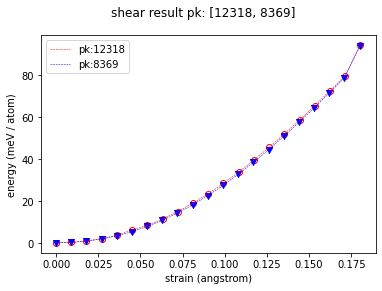

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
pks = []
for shear in shears:
    pks.append(shear['pk'])
    line_chart(
            ax,
            shear['strain'] * np.array(shear['shear_ratios']),
            (np.array(shear['relax_results']['energies']) \
                - shear['relax_results']['energies'][0]) \
                  * 1000 / shear['parent']['natoms'],
            "strain (angstrom)",
            "energy (meV / atom)",
            label = 'pk:' + str(shear['pk'])
            )
ax.legend()
fig.suptitle('shear result pk: %s' % pks)
plt.show()

## band strcutures

In [51]:
labels = get_default_labels_of_twinmode(shears[0]['shear_conf']['twinmode'])
pmgstructure = load_node(shears[0]['parent']['pk']).get_pymatgen_structure()
qpoints = get_qpoints_from_band_labels(pmgstructure, labels)

shear_phonons = []
for shear in shears:
    phonons = []
    for pk in shear['phonon_pks']:
        try:
            _, phonon = get_phonon_data(pk, get_phonon=True)
        except:
            print("phonon calc seems to have failed pk:{}".format(pk))
        phonons.append(phonon)
    shear_phonons.append(phonons)

phonon calc seems to have failed pk:13982
phonon calc seems to have failed pk:14193


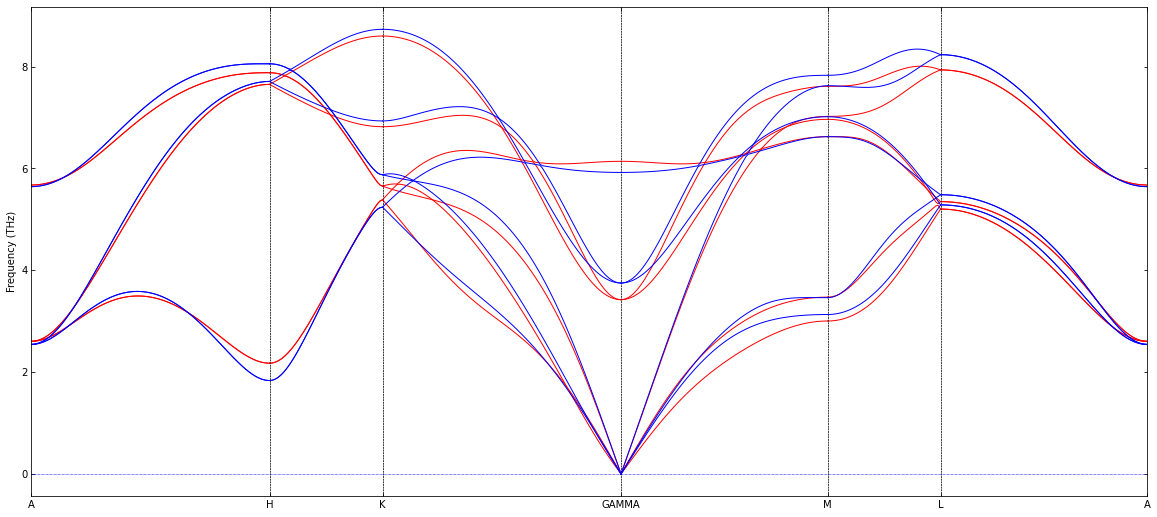

In [60]:
fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot(111)

# labels, qpoints = get_default_path_for_twin()
# band_plots(ax, shear_phonons[1][18:], band_labels=labels, segment_qpoints=qpoints)

labels = ['A', 'H', 'K', 'GAMMA', 'M', 'L', 'A']
qpoint = np.array([[0,0,1/2],
                   [1/3,1/3,1/2],
                   [1/3,1/3,0],
                   [0,0,0],
                   [1/2,0,0],
                   [1/2,0,1/2]])

# band_plots(ax, shear_phonons[1][0:1], band_labels=labels, segment_qpoints=qpoints)
band_plots(ax, [shear_phonons[1][0], shear_phonons[0][0]], band_labels=labels, segment_qpoints=qpoints)

# band_plot(ax, shear_phonons[0][0], is_auto=True)

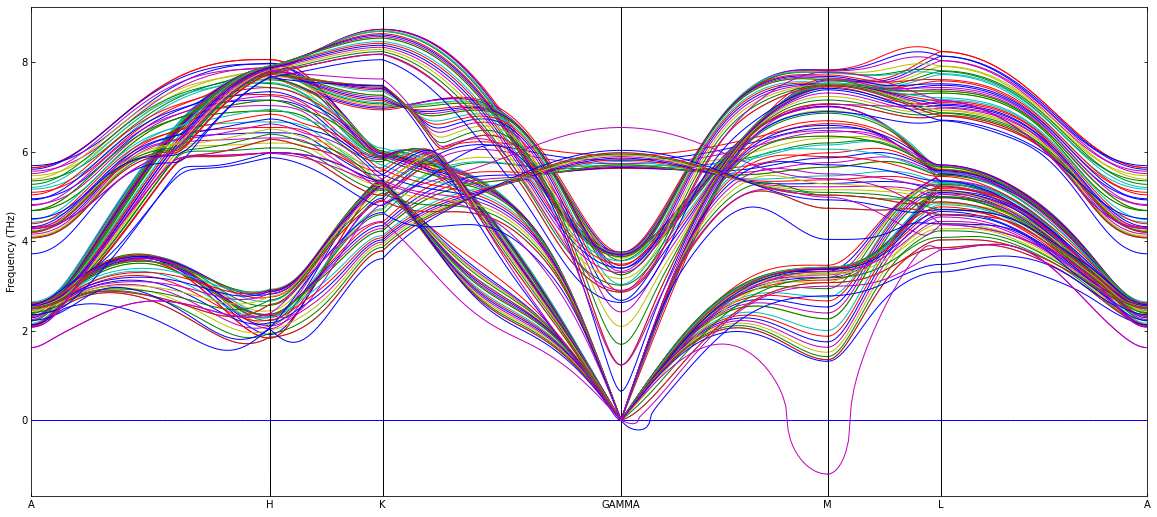

In [54]:
fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot(111)

# labels, qpoints = get_default_path_for_twin()
# band_plots(ax, shear_phonons[1][18:], band_labels=labels, segment_qpoints=qpoints)

labels = ['A', 'H', 'K', 'GAMMA', 'M', 'L', 'A']
qpoint = np.array([[0,0,1/2],
                   [1/3,1/3,1/2],
                   [1/3,1/3,0],
                   [0,0,0],
                   [1/2,0,0],
                   [1/2,0,1/2]])

band_plots(ax, shear_phonons[0], band_labels=labels, segment_qpoints=qpoints)

# band_plot(ax, shear_phonons[0][0], is_auto=True)

TypeError: list indices must be integers or slices, not tuple

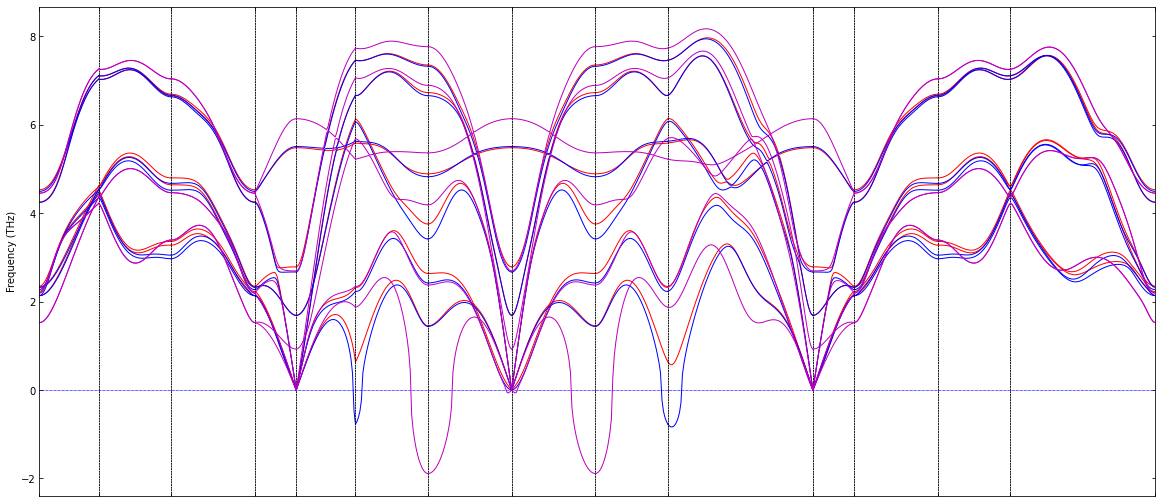

In [50]:
fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot(111)
labels = ['A', 'H', 'K', 'GAMMA', 'M', 'L', 'A']
qpoint = np.array([[0,0,1/2],
                   [1/3,1/3,1/2],
                   [1/3,1/3,0],
                   [0,0,0],
                   [1/2,0,0],
                   [1/2,0,1/2]])
band_plots(ax, shear_phonons[1][18:], band_labels=labels, segment_qpoints=qpoints)

In [ ]:
{
    'GAMMA': [0,0,0],
    'M_1': [0, 1/2, 0],
    'M_2': [1/2, 0, 0],
    'K_1': [-1/3, 2/3, 0],
    'K_2': [1/3, 1/3, 0],
    'L_1': [0, 1/2, 1/2],
    'L_2': [1/2, 0, 1/2],
    'H_1': [-1/3, 2/3, 1/2],
    'H_2': [1/3, 1/3, 1/2],
}

# band path is set automalically
[[ 2.89453792  0.          0.        ]
 [-1.44726896  2.50674337  0.        ]
 [ 0.          0.          4.58154364]]


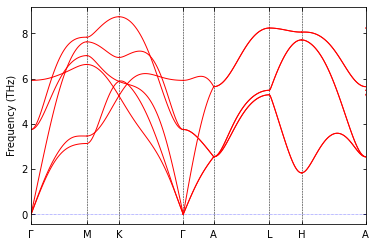

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
band_plots(ax, [shear_phonons[0][0]], is_auto=True)

In [11]:
print([ distance.shape for distance in distances ])
print([ base_distance.shape for base_distance in base_distances ])

NameError: name 'distances' is not defined

In [204]:
shear_phonons[0]

In [188]:
segment_lengths

[[0.1335736603447281,
  0.10864415052480553,
  0.13357366034472826,
  0.19968698795697076,
  0.10864415052480814,
  0.1996869879569707],
 [0.2303188575445012,
  0.10913352339038335,
  0.2303188575444996,
  0.19946198156685635,
  0.10913352339038163,
  0.19946198156685246]]

In [12]:
segment_lengths = []
for ds in [distances, base_distances]:
    lengths = []
    init = 0
    for d in ds:
        lengths.append(d[-1]-init)
        init = d[-1]
    segment_lengths.append(lengths)
ratios = np.array(segment_lengths)[0] /  np.array(segment_lengths)[1]
revised = []
seg_start = 0
for i, distance in enumerate(distances):
    if i == 0:
        revised.append(distance / ratios[i])
    else:
        revised.append(seg_start+(distance-distances[i-1][-1]) / ratios[i])
    seg_start = revised[-1][-1]

NameError: name 'distances' is not defined

In [193]:
for i in range(len(base_distances)):
    print(base_distances[i][-1])
    print(revised[i][-1])

0.2303188575445012
0.23031885754450118
0.33945238093488456
0.3394523809348845
0.5697712384793842
0.569771238479384
0.7692332200462405
0.7692332200462404
0.8783667434366221
0.878366743436622
1.0778287250034746
1.0778287250034744


In [14]:
relaxes = [ get_relax_data(pk) for pk in shears[0]['relax_pks'] ]
structure_pks = [ get_relax_data(pk)['final_structure_pk'] for pk in shears[0]['relax_pks'] ]
structures = [ get_structure_data(get_relax_data(pk)['final_structure_pk']) for pk in shears[0]['relax_pks'] ]

In [15]:
structures[0]

{'symprec': 1e-05,
 'volume': 33.24305637149892,
 'lattice': [[1.44726896, -2.50674337, 0.0],
  [1.44726896, 2.50674337, 0.0],
  [0.0, 0.0, 4.58154364]],
 'lattice_abc': [2.8945379191882146, 2.8945379191882146, 4.58154364],
 'lattice_angles': [90.0, 90.0, 119.9999999814453],
 'international': 'P6_3/mmc',
 'pointgroup': '6/mmm',
 'natoms': 2,
 'wyckoffs': ['c', 'c'],
 'site_symmetry_symbols': ['-6m2', '-6m2'],
 'hall': '-P 6c 2c',
 'hall_number': 488,
 'pk': 13265,
 'data_type': 'StructureData'}

In [16]:
structures[1]

{'symprec': 1e-05,
 'volume': 33.24305636326835,
 'lattice': [[1.43751589, -2.50111243, -0.0102916],
  [1.44726896, 2.50674337, 0.0],
  [0.01950615, -0.01126188, 4.60212683]],
 'lattice_abc': [2.884808700509196, 2.8945379191882146, 4.602181947645573],
 'lattice_angles': [89.99999998967577, 89.96183113359284, 120.11162649484449],
 'international': 'Cmcm',
 'pointgroup': 'mmm',
 'natoms': 2,
 'wyckoffs': ['c', 'c'],
 'site_symmetry_symbols': ['m2m', 'm2m'],
 'hall': '-C 2c 2',
 'hall_number': 298,
 'pk': 13532,
 'data_type': 'StructureData'}

In [17]:
pmgstructure = load_node(structure_pks[1]).get_pymatgen()

In [18]:
pmgstructure

Structure Summary
Lattice
    abc : 2.884808700509196 2.8945379191882146 4.602181947645573
 angles : 89.99999998967577 89.96183113359284 120.11162649484449
 volume : 33.24305636326835
      A : 1.43751589 -2.50111243 -0.0102916
      B : 1.44726896 2.50674337 0.0
      C : 0.01950615 -0.01126188 4.60212683
PeriodicSite: Ti (1.4489, 0.8346, 1.1471) [0.3333, 0.6667, 0.2500]
PeriodicSite: Ti (1.4554, -0.8403, 3.4447) [0.6667, 0.3333, 0.7500]

In [19]:
analizer = SpacegroupAnalyzer(pmgstructure, symprec=1e-5)

In [20]:
analizer.get_primitive_standard_structure(pmgstructure)

Structure Summary
Lattice
    abc : 2.8848087019626556 2.884808701962656 4.602181947645573
 angles : 90.0 90.0 119.77674691075967
 volume : 33.24306622066883
      A : 1.4472689595941068 -2.495502715990278 -6.418580572643884e-17
      B : 1.4472689595941077 2.495502715990278 2.4142513561366323e-16
      C : 0.0 0.0 4.602181947645573
PeriodicSite: Ti (1.4473, -0.8318, 1.1505) [0.6667, 0.3333, 0.2500]
PeriodicSite: Ti (1.4473, 0.8318, 3.4516) [0.3333, 0.6667, 0.7500]

In [21]:
analizer.get_space_group_symbol()

'Cmcm'

In [22]:
phonons[0].get_unitcell().cell

array([[ 1.44676428, -2.50586924,  0.        ],
       [ 1.44676428,  2.50586924,  0.        ],
       [ 0.        ,  0.        ,  4.58098687]])

In [23]:
phonons[0].get_primitive().cell

array([[ 2.89352856,  0.        ,  0.        ],
       [-1.44676428,  2.50586924,  0.        ],
       [ 0.        ,  0.        ,  4.58098687]])

In [24]:
np.dot(phonons[0].get_unitcell().cell.T, phonons[0].get_primitive_matrix()).T

array([[ 2.89352856,  0.        ,  0.        ],
       [-1.44676428,  2.50586924,  0.        ],
       [ 0.        ,  0.        ,  4.58098687]])